In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [3]:
np.random.rand(3, 3)

array([[0.26290975, 0.65092944, 0.88432555],
       [0.52172766, 0.37057832, 0.71163161],
       [0.48499985, 0.78296926, 0.2578664 ]])

In [121]:
class MLP:
    def __init__(self, num_inputs, hidden_layers=[10, 10], num_outputs=2, epochs=100, learning_rate=0.1):
        # using default hidden layers of 10, 10
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        self.epochs = epochs
        self.learning_rate = learning_rate

        layers = [num_inputs] + hidden_layers + [num_outputs]

        # initiate random weights 
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        self.derivatives = [np.zeros(w.shape) for w in self.weights]

        # save activations per layer        
        self.activations = [np.zeros(i) for i in layers]


    def forward_propagate(self, x):
        # save input into activations
        activations = x 
        self.activations[0] = activations

        for idx, w in enumerate(self.weights):
            net_inputs = np.dot(activations, w)
            activations = self._sigmoid(net_inputs)
            self.activations[idx + 1] = activations

        return activations


    def back_propagate(self, error):
        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_derivative(activations)
            delta_re = delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations = current_activations.reshape(current_activations.shape[0],-1)
            self.derivatives[i] = np.dot(current_activations, delta_re)
            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets):
        for i in range(self.epochs):
            sum_errors = 0
            for j, input in enumerate(inputs):
                target = targets[j]
                output = self.forward_propagate(input)
                error = target - output
                self.back_propagate(error)
                self.gradient_descent()
                sum_errors += self._calc_error(target, output)
            print("Error: {} at epoch {}".format(sum_errors / len(inputs), i+1))
        print("Training completed")

    def gradient_descent(self):
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * self.learning_rate 


    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):
        return x * (1.0 - x)

    def _calc_error(self, target, output):
        return np.average((target - output) ** 2)
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            y_pred.append(self.forward_propagate(X[i]))
        return np.array(y_pred).round()

In [138]:
if __name__ == "__main__":
    # XOR example
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])
    mlp = MLP(num_inputs=2, hidden_layers=[5, 5], num_outputs=1, epochs=20000, learning_rate=0.1)
    mlp.train(X, y)
    pred = mlp.predict(X)
    print("pred: ", pred)
    acc = accuracy_score(y, pred)
    print(f'Accuracy score: {acc}')

Error: 0.4476990093448835 at epoch 1
Error: 0.44621624275343674 at epoch 2
Error: 0.444661295107902 at epoch 3
Error: 0.44302962163754567 at epoch 4
Error: 0.44131637169894283 at epoch 5
Error: 0.43951637449393144 at epoch 6
Error: 0.4376241264968286 at epoch 7
Error: 0.43563378147860654 at epoch 8
Error: 0.4335391442628366 at epoch 9
Error: 0.43133366964886855 at epoch 10
Error: 0.42901046829927203 at epoch 11
Error: 0.42656232181723386 at epoch 12
Error: 0.4239817097391092 at epoch 13
Error: 0.4212608517365338 at epoch 14
Error: 0.4183917689523138 at epoch 15
Error: 0.41536636906304336 at epoch 16
Error: 0.4121765603286999 at epoch 17
Error: 0.4088144004885973 at epoch 18
Error: 0.4052722867915552 at epoch 19
Error: 0.4015431935577206 at epoch 20
Error: 0.39762096325693386 at epoch 21
Error: 0.39350065589061667 at epoch 22
Error: 0.3891789591617823 at epoch 23
Error: 0.38465465815706085 at epoch 24
Error: 0.379929157704582 at epoch 25
Error: 0.3750070429685268 at epoch 26
Error: 0.36

In [124]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
df['diagnosis'].replace('M', 1, inplace=True)
df['diagnosis'].replace('B', 0, inplace=True)

X = df.iloc[:, 2:4]
y = df.iloc[:, 1]
X = np.array(X)
y = np.array(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mlp = MLP(num_inputs=len(X_train[0]), hidden_layers=[5, 5], num_outputs=1, epochs=10000, learning_rate=0.1)
mlp.train(X_train, y_train)
pred = mlp.predict(X_test)
print("pred: ", pred)
print("y_test: ", y_test)
acc = accuracy_score(y_test, pred)

Error: 0.31956483274445124 at epoch 1
Error: 0.2361622671064507 at epoch 2
Error: 0.23612334215387304 at epoch 3
Error: 0.2360871813924495 at epoch 4
Error: 0.23605458307508015 at epoch 5
Error: 0.23601767521693945 at epoch 6
Error: 0.23597353186307063 at epoch 7
Error: 0.23592042737722407 at epoch 8
Error: 0.23585624958432141 at epoch 9
Error: 0.23577860496884626 at epoch 10
Error: 0.23568499045230784 at epoch 11
Error: 0.23557283840013987 at epoch 12
Error: 0.23543941829956738 at epoch 13
Error: 0.23528164692875247 at epoch 14
Error: 0.23509594477304288 at epoch 15
Error: 0.23487830221064185 at epoch 16
Error: 0.23462462149140043 at epoch 17
Error: 0.2343311192915075 at epoch 18
Error: 0.2339943574120941 at epoch 19
Error: 0.23361102661557342 at epoch 20
Error: 0.23317879269129074 at epoch 21
Error: 0.23269946978199751 at epoch 22
Error: 0.23218323333895752 at epoch 23
Error: 0.23165179763493715 at epoch 24
Error: 0.23113978300599328 at epoch 25
Error: 0.23069323695974267 at epoch 26

KeyboardInterrupt: 

/Users/parthokr/Documents/Class/4-2/CSE 4204/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


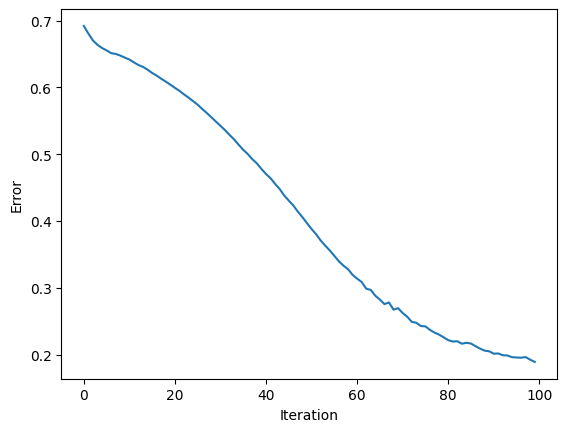

pred:  [0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 1 0]
y_test:  [0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 0]
Accuracy score: 0.9122807017543859
F1 score: 0.868421052631579
Confusion matrix: 
[[71  2]
 [ 8 33]]


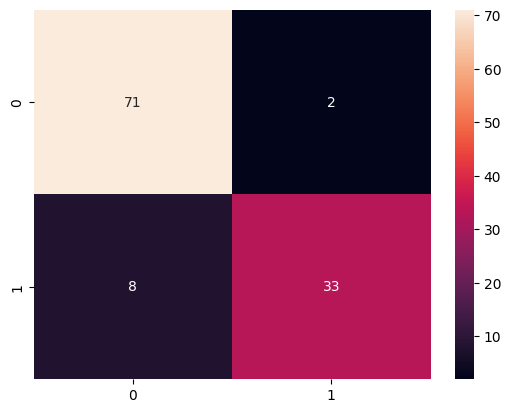

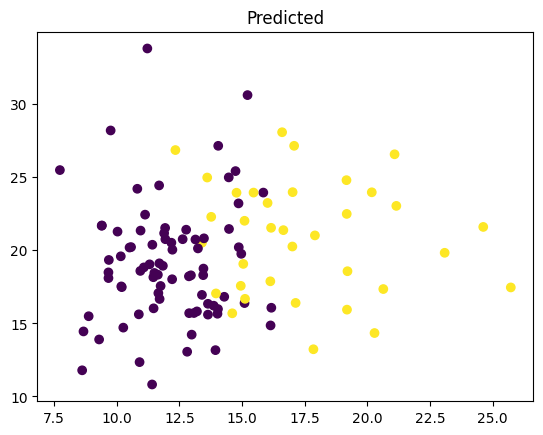

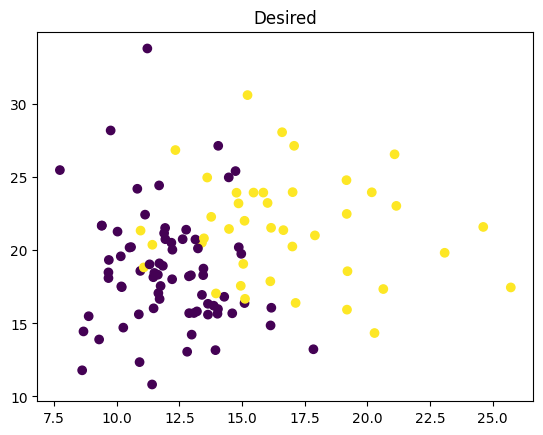

weight_of_hidden_units: 
 [[-1.65831748e-01 -5.86829960e-02  1.03009955e-01 -1.02338794e-01
  -3.48188917e-02 -1.44340723e-01  5.63289716e-02  2.16031000e-02
   1.98543309e-01  1.21719122e-01 -1.31726534e-02 -1.00793572e-01
  -3.72964366e-02 -5.00219781e-02 -7.83222820e-02 -2.85466834e-02
   1.84092204e-02 -8.03896759e-02  1.06189374e-01  3.49347370e-03
  -2.31099655e-02 -3.27674429e-02 -3.49200696e-02  6.75165104e-02
  -1.14813222e-03 -2.31184996e-01 -8.32755975e-02 -9.92586105e-02
  -1.51065069e-01  1.57250204e-02]
 [-2.07504825e-02  1.97314452e-03  6.21493758e-02 -5.57934873e-02
  -4.47826595e-02 -6.66084194e-02 -4.50830252e-03  9.84160219e-03
  -6.23907112e-02  5.94843159e-02  3.82348708e-03 -3.49086739e-02
   1.07823087e-02 -5.96549828e-02 -2.06226089e-02 -4.01911305e-02
   1.63107671e-03 -3.34557393e-02  2.30945475e-03  2.07829605e-02
  -2.00747713e-01  1.44439291e-01  6.44412777e-03 -4.89739021e-02
   3.08159322e-03 -6.02767487e-02 -2.84676127e-02 -4.75285156e-02
   2.29571242e-

In [145]:
if __name__ == '__main__':
    df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
    df['diagnosis'].replace('M', 1, inplace=True)
    df['diagnosis'].replace('B', 0, inplace=True)
    
    X = df.iloc[:, 2:32]
    y = df.iloc[:, 1]
    X = np.array(X)
    y = np.array(y)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=100, alpha=0.0001, tol=0.000000001, activation='logistic')
    
    clf.fit(X_train, y_train)
    loss = clf.loss_curve_
    # plot loss curve
    import matplotlib.pyplot as plt
    plt.plot(loss)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()
    
    pred = clf.predict(X_test)
    print("pred: ", pred)
    print("y_test: ", y_test)
    acc = accuracy_score(y_test, pred)
    print(f'Accuracy score: {acc}')
    f1 = f1_score(y_test, pred)
    print(f'F1 score: {f1}')
    cm = confusion_matrix(y_test, pred)
    print(f'Confusion matrix: \n{cm}')
    # plot confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True)
    plt.show()
    # plot scatter plot 
    plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
    plt.title("Predicted")
    plt.show()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.title("Desired")
    plt.show()
    
    
    # print final weights and bias
    print("weight_of_hidden_units: \n", clf.coefs_[0])
    print("weight_of_output_units: \n", clf.coefs_[1])
    print("bias_of_hidden_units: \n", clf.intercepts_[0])
    print("bias_of_output_units: \n", clf.intercepts_[1])
    